In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [7]:
df=df.drop(["who","alive","embarked","deck"],axis=1)

In [8]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [10]:
df[df["embark_town"].isnull()].index

Int64Index([61, 829], dtype='int64')

In [11]:
df.drop(index=[61, 829],inplace = True)

In [12]:
df.reset_index(drop=True, inplace = True)

<AxesSubplot:>

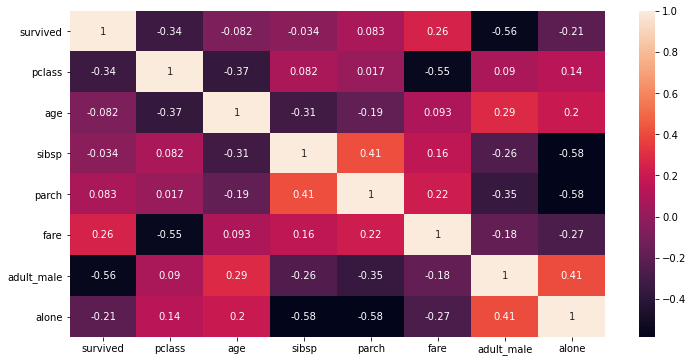

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.groupby(["sex","pclass"])["survived"].mean()

sex     pclass
female  1         0.967391
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='survived'>

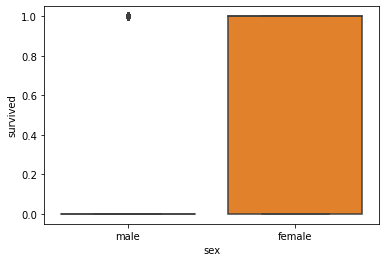

In [15]:
sns.boxplot(x="sex", y="survived", data=df)

In [16]:
df.groupby(["class","sex"]).mean()

survived  pclass        age     sibsp     parch        fare  \
class  sex                                                                   
First  female  0.967391     1.0  34.240964  0.565217  0.467391  106.693750   
       male    0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
Second female  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       male    0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
Third  female  0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
       male    0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
class  sex                           
First  female    0.000000  0.347826  
       male      0.975410  0.614754  
Second female    0.000000  0.421053  
       male      0.916667  0.666667  
Third  female    0.000000  0.416667  
       male      0.919308  0.760807

In [17]:
df.groupby(["class","sex"]).count()

survived  pclass  age  sibsp  parch  fare  adult_male  \
class  sex                                                             
First  female        92      92   83     92     92    92          92   
       male         122     122  101    122    122   122         122   
Second female        76      76   74     76     76    76          76   
       male         108     108   99    108    108   108         108   
Third  female       144     144  102    144    144   144         144   
       male         347     347  253    347    347   347         347   

               embark_town  alone  
class  sex                         
First  female           92     92  
       male            122    122  
Second female           76     76  
       male            108    108  
Third  female          144    144  
       male            347    347

In [18]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,Second,True,Southampton,True
885,1,1,female,19.0,0,0,30.0000,First,False,Southampton,True
886,0,3,female,NaN,1,2,23.4500,Third,False,Southampton,False
887,1,1,male,26.0,0,0,30.0000,First,True,Cherbourg,True


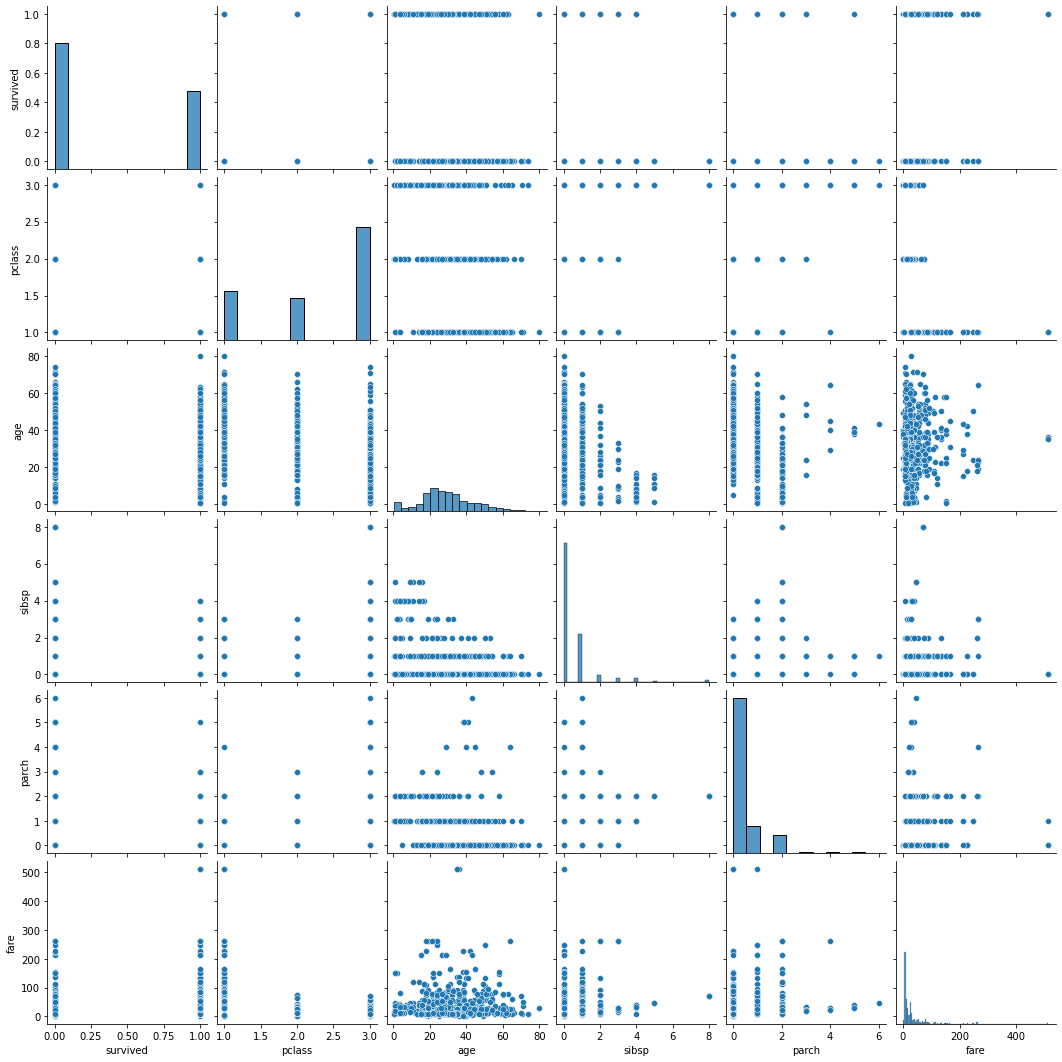

In [19]:
sns.pairplot(df.drop(["adult_male","alone"], axis = 1))

In [20]:
df["age"].max()

80.0

In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
adult_male       0
embark_town      0
alone            0
dtype: int64

In [22]:
df[df["age"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
5,0,3,male,NaN,0,0,8.4583,Third,True,Queenstown,True
17,1,2,male,NaN,0,0,13.0000,Second,True,Southampton,True
19,1,3,female,NaN,0,0,7.2250,Third,False,Cherbourg,True
26,0,3,male,NaN,0,0,7.2250,Third,True,Cherbourg,True
28,1,3,female,NaN,0,0,7.8792,Third,False,Queenstown,True
...,...,...,...,...,...,...,...,...,...,...,...
857,0,3,male,NaN,0,0,7.2292,Third,True,Cherbourg,True
861,0,3,female,NaN,8,2,69.5500,Third,False,Southampton,False
866,0,3,male,NaN,0,0,9.5000,Third,True,Southampton,True
876,0,3,male,NaN,0,0,7.8958,Third,True,Southampton,True


In [23]:
round(df[df["sex"]=="male"]["age"].mean())

31

In [24]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
adult_male       0
embark_town      0
alone            0
dtype: int64

In [25]:
df["age"] = df.groupby(["class","sex"])["age"].apply(lambda x:x.fillna(round(x.mean())))

In [26]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [27]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,Second,True,Southampton,True
885,1,1,female,19.0,0,0,30.0000,First,False,Southampton,True
886,0,3,female,22.0,1,2,23.4500,Third,False,Southampton,False
887,1,1,male,26.0,0,0,30.0000,First,True,Cherbourg,True


In [28]:
df.drop("adult_male",axis=1,inplace=True)

In [29]:
df["alone"].replace([False,True],[0,1], inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   class        889 non-null    category
 8   embark_town  889 non-null    object  
 9   alone        889 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(2)
memory usage: 63.6+ KB


<AxesSubplot:>

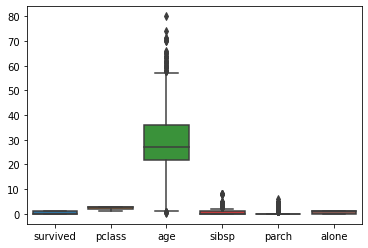

In [31]:
sns.boxplot(data=df.drop('fare',axis=1))

<AxesSubplot:xlabel='fare'>

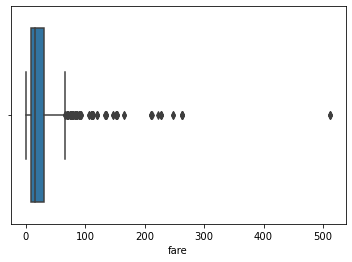

In [32]:
sns.boxplot(data=df, x='fare')

In [33]:
df["fare"].quantile(0.75)

31.0

In [34]:
df["fare"].quantile(0.25)

7.8958

In [35]:
iqr = df["fare"].quantile(0.75)-df["fare"].quantile(0.25)

In [36]:
iqr*1.5

34.6563

In [37]:
upper_bound = df["fare"].quantile(0.75)+iqr*1.5

In [38]:
lower_bound = df["fare"].quantile(0.25) - iqr*1.5

In [39]:
upper_bound

65.6563

In [84]:
df.loc[df["fare"]>65,"fare"] = 65

In [53]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.0,1,0,7.250,Third,Southampton,0
1,1,1,female,38.0,1,0,65.000,First,Cherbourg,0
2,1,3,female,26.0,0,0,7.925,Third,Southampton,1
3,1,1,female,35.0,1,0,53.100,First,Southampton,0
4,0,3,male,35.0,0,0,8.050,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.000,Second,Southampton,1
885,1,1,female,19.0,0,0,30.000,First,Southampton,1
886,0,3,female,22.0,1,2,23.450,Third,Southampton,0
887,1,1,male,26.0,0,0,30.000,First,Cherbourg,1


C:\Users\potar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

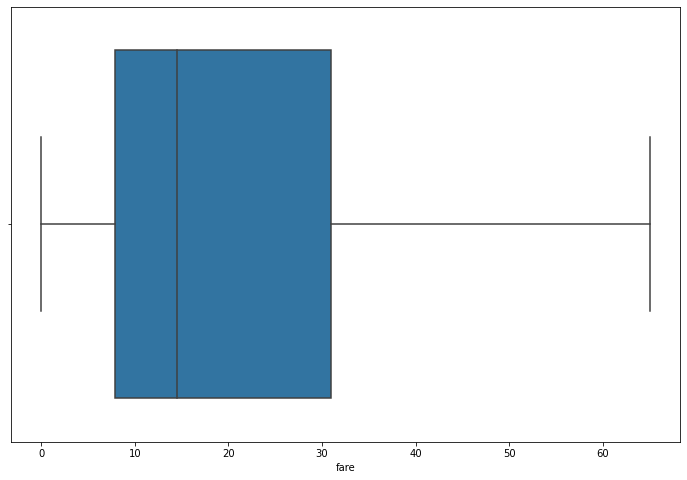

In [58]:
plt.figure(figsize = (12,8))
sns.boxplot(df["fare"])

C:\Users\potar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

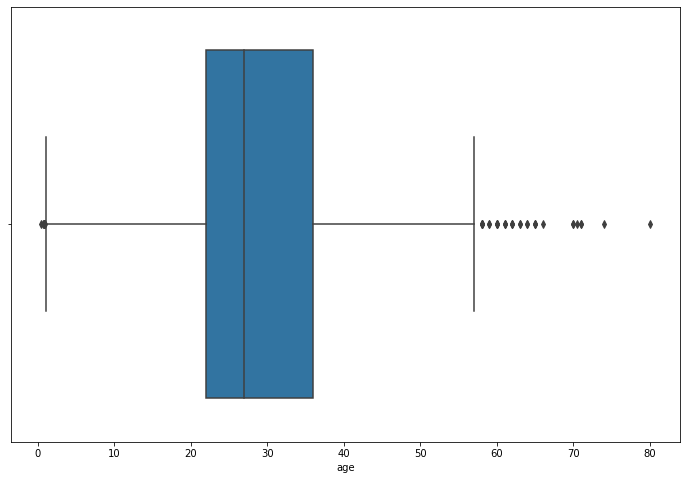

In [57]:
plt.figure(figsize = (12,8))
sns.boxplot(df["age"])

In [56]:
df["age"].min()

0.42

In [59]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.0,1,0,7.250,Third,Southampton,0
1,1,1,female,38.0,1,0,65.000,First,Cherbourg,0
2,1,3,female,26.0,0,0,7.925,Third,Southampton,1
3,1,1,female,35.0,1,0,53.100,First,Southampton,0
4,0,3,male,35.0,0,0,8.050,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.000,Second,Southampton,1
885,1,1,female,19.0,0,0,30.000,First,Southampton,1
886,0,3,female,22.0,1,2,23.450,Third,Southampton,0
887,1,1,male,26.0,0,0,30.000,First,Cherbourg,1


In [61]:
df["family_size"] = df["sibsp"]+df["parch"]+1

In [64]:
df.drop(["sibsp","parch","class"], axis =1)

,survived,pclass,sex,age,fare,embark_town,alone,family_size
0,0,3,male,22.0,7.250,Southampton,0,2
1,1,1,female,38.0,65.000,Cherbourg,0,2
2,1,3,female,26.0,7.925,Southampton,1,1
3,1,1,female,35.0,53.100,Southampton,0,2
4,0,3,male,35.0,8.050,Southampton,1,1
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,13.000,Southampton,1,1
885,1,1,female,19.0,30.000,Southampton,1,1
886,0,3,female,22.0,23.450,Southampton,0,4
887,1,1,male,26.0,30.000,Cherbourg,1,1


sns.boxplot(x=df["survived"],y=df["pclass"],z=df[])

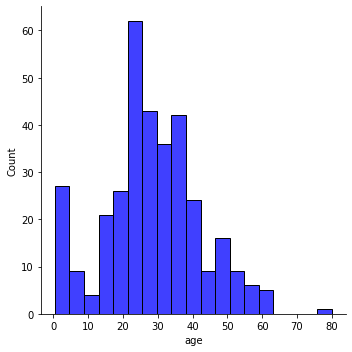

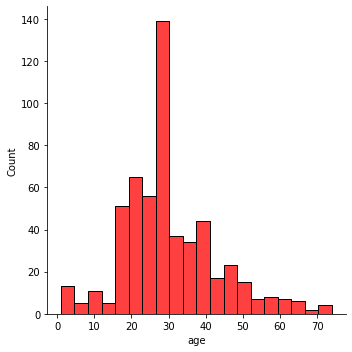

In [82]:
sns.displot(df[df["survived"]==1]["age"], label ="yaşayanlar", color = "blue")
sns.displot(df[df["survived"]==0]["age"], label ="ölüler", color = "red")

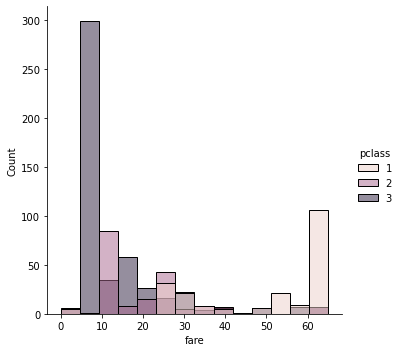

In [80]:
sns.displot(x="fare",data = df, hue="pclass", color = "red")